# DIGITAL WEEK COMPETITION
## Zombie webpages


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import webbrowser
# Not necessary
from jupyterthemes import jtplot

# Insert own path
PATH = 'Data'

In [4]:
# Config the matplotlib backend as plotting inline in IPython

# DON'T RUN IF jtplot NOT IMPORTED

%matplotlib inline
jtplot.reset()
sns.set()

C:\Users\juann\Anaconda3\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\juann\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\juann\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


***
## Data Preprocessing

Let us first import the Data from the different excels and select only the relevant columns, after a first selection has been made with customer's SEO expert.

In [5]:
# Data loading function, file must be closed in excel
def read_xlsx(PATH, filename, header=0, sheet_name = None):
    df = pd.read_excel(os.path.join(PATH, filename), sheet_name = sheet_name, header = 0)
    return df

In [6]:
omniture = read_xlsx(PATH, filename = 'data-set-business-Omniture.xlsx', sheet_name = 'Feuil1')
omniture = omniture[['PageUrl', 'Visits', 'Average time spent by page (seconds)', 'Orders', 'Average basket', 'Conversion rate']]
omniture.rename(columns={'PageUrl': 'URL'}, inplace=True)
omniture.head()

,URL,Visits,Average time spent by page (seconds),Orders,Average basket,Conversion rate
0,https://www.oui.sncf/,30345167,63,4990836,97,0.1645
1,https://www.oui.sncf/monvoyage/confirmation,4539262,60,4789208,82,1.0551
2,https://www.oui.sncf/reservation/paiement/chec...,4666189,8,4648892,89,0.9963
3,https://www.oui.sncf/billet-train,13715377,65,3446575,95,0.2513
4,https://www.oui.sncf/reservation/confirmation,2462024,86,2738095,101,1.1121


In [7]:
majestic = read_xlsx(PATH, filename = 'data-set-backlinks-majestic-seo-15K-urls.xlsx', sheet_name = 'Data')
majestic = majestic[['URL', 'ReferringExtBackLinks', 'ReferringExtDomains', 'TrustFlow', 'CitationFlow']]
majestic.head()

,URL,ReferringExtBackLinks,ReferringExtDomains,TrustFlow,CitationFlow
0,https://www.oui.sncf/,865640,4885,60,57
1,https://www.oui.sncf/aide/,98011,1332,32,49
2,https://www.oui.sncf/billet-train,19480,1096,35,46
3,https://www.oui.sncf/carte-familles-nombreuses...,7507,619,24,41
4,https://www.oui.sncf/billet-train/horaires/,383086,483,31,46


In [8]:
gg_search_console_ = read_xlsx(PATH, filename = 'data-set-google-search-console.xlsx', sheet_name = 'DB www.oui.sncf 2018')
gg_search_console_ = gg_search_console_[['Page', 'CTR', 'Impressions', 'Position']]
gg_search_console_.rename(columns={'Page': 'URL'}, inplace=True)
gg_search_console = gg_search_console_.groupby('URL')['CTR', 'Position'].aggregate('mean')
gg_search_console['Impressions'] = gg_search_console_.groupby('URL')['Impressions'].aggregate('sum')
gg_search_console.head()

,CTR,Position,Impressions
URL,,,
https://www.oui.sncf/,0.315976,3.210332,153221589
https://www.oui.sncf/404,0.085714,6.028571,35
https://www.oui.sncf/aide,0.003260,4.584155,14766476
https://www.oui.sncf/aide/achat-d-un-billet-de-train-pour-quelqu-un-d-autre,0.121561,6.390852,167139
https://www.oui.sncf/aide/achat-de-votre-billet-depuis-l-etranger,0.024809,3.882992,113862


In [9]:
logs = read_xlsx(PATH, filename = 'data-set-logs-botify.xlsx', sheet_name = 'Data')
logs = logs[['URL', 'Crawls: Count On Period By Google']]
logs['Crawls_year'] = logs['Crawls: Count On Period By Google'].apply(lambda x: x * 4)
logs = logs[['URL', 'Crawls_year']]
logs.head()

,URL,Crawls_year
0,https://www.oui.sncf/,45224.0
1,https://www.oui.sncf/billet-train/horaires,23136.0
2,https://www.oui.sncf/billet-train,31180.0
3,https://www.oui.sncf/kis,4288.0
4,https://www.oui.sncf/billet-train-old,0.0


In [10]:
technical = read_xlsx(PATH, filename = 'data-set-technical-data-botify.xlsx', sheet_name = 'Export-donnees-techniques')
technical = technical[['Full URL','HTTP Status Code','pagetype','Is Compliant','Delay Total','Content Byte Size','No. of Words (Total)','No. of Words (Not Ignored)','Title Length','Meta Description Length','Depth','No. of Internal Inlinks (From Distinct URLs)']]
technical.rename(columns={'Full URL': 'URL'}, inplace=True)
technical.head()

,URL,HTTP Status Code,pagetype,Is Compliant,Delay Total,Content Byte Size,No. of Words (Total),No. of Words (Not Ignored),Title Length,Meta Description Length,Depth,No. of Internal Inlinks (From Distinct URLs)
0,https://www.oui.sncf/,200,Homes,True,588,290861,1469,1033,55,151,0,141397
1,https://www.oui.sncf/espaceclient/identification,200,EspaceClient,False,249,64011,0,0,41,0,1,7233
2,https://www.oui.sncf/services-train/suivi-comm...,302,Services,False,349,0,0,0,0,0,1,48893
3,https://www.oui.sncf/billet-train,200,LT-Train,True,687,203447,1514,985,53,116,1,46088
4,https://www.oui.sncf/bons-plans/tgvmax,200,Promo,True,464,187809,2362,1906,40,111,1,33437


We will now merge the data, to create one final aggregated Data Frame.

In [11]:
# merge data
data_inner = technical.merge(majestic, how='inner',on='URL')
data_inner = data_inner.merge(omniture, how='inner',on='URL')
data_inner = data_inner.merge(gg_search_console, how='inner',on='URL')
data_inner = data_inner.merge(logs, how='inner',on='URL')
print("\n", 'Shape of the Data frame inner :', data_inner.shape)


 Shape of the Data frame inner : (2401, 25)


In [12]:
# merge data
data = technical.merge(majestic, how='left',on='URL')
data = data.merge(omniture, how='left',on='URL')
data = data.merge(gg_search_console, how='left',on='URL')
data = data.merge(logs, how='left',on='URL')
print("\n", 'Shape of the Data frame :', data.shape)


 Shape of the Data frame : (50614, 25)


Well only keep data when the HTTP Status Code is 200, meaning the page will load.

In [13]:
data = data.loc[data['HTTP Status Code'] == 200]
data.head()
print("\n", 'Shape of the Data frame :', data.shape)


 Shape of the Data frame : (35268, 25)


In [14]:
# merge data
data_inner = technical.merge(majestic, how='inner',on='URL')
data_inner = data_inner.merge(omniture, how='inner',on='URL')
data_inner = data_inner.merge(gg_search_console, how='inner',on='URL')
data_inner = data_inner.merge(logs, how='inner',on='URL')
print("\n", 'Shape of the Data frame inner :', data_inner.shape)

data_inner = data_inner.loc[data_inner['HTTP Status Code'] == 200]
data_inner.head()
print("\n", 'Shape of the Data frame inner :', data_inner.shape)


 Shape of the Data frame inner : (2401, 25)

 Shape of the Data frame inner : (2354, 25)


In [15]:
print("", 'Shape of the Data frame omniture :', omniture.shape)
print("\n", 'Shape of the Data frame majestic :', majestic.shape)
print("\n", 'Shape of the Data frame gg_search_console :', gg_search_console.shape)
print("\n", 'Shape of the Data frame logs :', logs.shape)
print("\n", 'Shape of the Data frame technical :', technical.shape)

print("\n", 'Shape of the Data frame :', data.shape)
print("\n", 'Shape of the Data frame inner join :', data.shape)

 Shape of the Data frame omniture : (19718, 6)

 Shape of the Data frame majestic : (14992, 5)

 Shape of the Data frame gg_search_console : (15546, 3)

 Shape of the Data frame logs : (364003, 2)

 Shape of the Data frame technical : (50613, 12)

 Shape of the Data frame : (35268, 25)

 Shape of the Data frame inner join : (35268, 25)


Checking the NA

In [16]:
data.isnull().sum()

URL                                                 0
HTTP Status Code                                    0
pagetype                                            0
Is Compliant                                        0
Delay Total                                         0
Content Byte Size                                   0
No. of Words (Total)                                0
No. of Words (Not Ignored)                          0
Title Length                                        0
Meta Description Length                             0
Depth                                               0
No. of Internal Inlinks (From Distinct URLs)        0
ReferringExtBackLinks                           31282
ReferringExtDomains                             31282
TrustFlow                                       31282
CitationFlow                                    31282
Visits                                          20271
Average time spent by page (seconds)            20271
Orders                      

In [17]:
data.Position = data.Position.fillna(value = -1)
data = data.fillna(value = 0)

***
## Creating the training data

In [18]:
data_frame_non_zombies = data_inner.copy()
data_frame = data.copy()

In [19]:
def create_train_data(data_frame_non_zombies, data_frame, len_train_data = 100):
    
    # Filtering according to our thresholds
    training_data_normal = data_frame_non_zombies[ (data_frame_non_zombies[ 'Visits' ] >=  50) | (data_frame_non_zombies[ 'Orders' ] >=  1) ].copy()
    # Getting the different random indexes
    indexes_normal = np.random.choice(training_data_normal.index.values, round(0.6 * len_train_data), replace=False)
    # Creating the Training Data Frame for random indexes
    training_data_normal = training_data_normal.loc[list(indexes_normal), :]
    # Creating zombie column
    training_data_normal['Zombie'] = 0
    
    # Creating the Training Data Frame for likely zombies
    training_data_zombie = data_frame[ (data_frame[ 'Visits' ] < 50) & (data_frame[ 'Orders' ] < 1) ].copy()
    # Getting the different indexes
    indexes_zombie = np.random.choice(training_data_zombie.index.values, round(0.4 * len_train_data), replace=False)
    training_data_zombie = training_data_zombie.loc[list(indexes_zombie), :]
    # Creating zombie column
    training_data_zombie['Zombie'] = 1
    
    # Getting the human input
    for i in range(training_data_zombie.shape[0]):
        # Prints the browser URL
        print(training_data_zombie.iloc[i,0])
        # Opens the URL for you. If you have issues, # the following line and use the print result
        webbrowser.open(training_data_zombie.iloc[i,0])
        zombie =""

        while True:
            try:
                zombie = int(input('Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ?'))
            except ValueError:
                print("Sorry, value must be 0, 1 or 2. Input again.")
                #better try again... Return to the start of the loop
                continue
            if zombie not in [0,1,2]:
                print("Sorry, value must be 0, 1 or 2. Input again.")
                continue
            else:
                break
        
        training_data_zombie.iloc[i,-1] = zombie
        print('\n')
    
     # Stacking both
    training_data = pd.concat([training_data_normal, training_data_zombie])
        
    return training_data    

In [64]:
# Example
create_train_data(data_frame_non_zombies, data_frame, len_train_data = 4)

https://ouitalk.oui.sncf/ouiwork/experience-client/oui-work-ouvre-ses-portes-au-grand-public


Zombie (1) or not (0) ? 0




https://www.oui.sncf/train/trajet/grenoble/feyzin


Zombie (1) or not (0) ? 1


,URL,HTTP Status Code,pagetype,Is Compliant,Delay Total,Content Byte Size,No. of Words (Total),No. of Words (Not Ignored),Title Length,Meta Description Length,...,Visits,Average time spent by page (seconds),Orders,Average basket,Conversion rate,CTR,Position,Impressions,Crawls_year,Zombie
191,https://www.oui.sncf/hotel/etats-unis/new-york,200,Hotel,True,307,92903,1609,1029,48,113,...,454.0,49.0,8.0,1144.0,0.0176,0.012805,30.453215,38833.0,892.0,0
2387,https://www.oui.sncf/article/paris-dans-les-pa...,200,Article,True,1820,155353,1157,578,37,160,...,13.0,4.0,1.0,1.0,0.0769,0.208333,10.750000,24.0,100.0,0
42839,https://ouitalk.oui.sncf/ouiwork/experience-cl...,200,Host/Open-VSC,True,1013,34658,991,785,54,157,...,0.0,0.0,0.0,0.0,0.0000,0.000000,-1.000000,0.0,0.0,0
723,https://www.oui.sncf/train/trajet/grenoble/feyzin,200,Train/OD,True,665,117274,538,72,43,140,...,0.0,0.0,0.0,0.0,0.0000,0.000000,-1.000000,0.0,28.0,1


> **Each person should run the cell named after oneself ! We'll then import those on Git and aggregate them.**

In [ ]:
# ALEX
alex_train = create_train_data(data_frame_non_zombies, data_frame, len_train_data = 250)
# Exporting the xslx file
alex_train.to_excel("alex_train.xlsx")

In [22]:
# JUAN
juan_train = create_train_data(data_frame_non_zombies, data_frame, len_train_data = 250)
# Exporting the xslx file
juan_train.to_excel("juan_train.xlsx")

https://www.oui.sncf/article/printemps/122


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/specialites-auvergnates-le-bleu-dauvergne-67606


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/beauvais/zadar


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/immersion-dans-la-vie-de-leonard-de-vinci-au-clos-luce-83596


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/hotel/suede/malmo


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/senior/170


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/la-cote-corail-de-bizerte-tabarka-70230


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/bus/trajet/metz/paris


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/londres/kuala-lumpur


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://ouitalk.oui.sncf/blog/innovation/ecomotion-2017-voyage-au-coeur-de-la-mobilite-du-futur


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/printemps/3


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/montreal/guadalajara


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/vol/trajet/chisinau/paris


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/vol/trajet/zagreb/bruxelles


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/article/98


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/irkutsk/paris


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/senior/124


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/rabat/amman


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/vol/trajet/brisbane/christchurch


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://autotrain.oui.sncf/autotrain-webapp/solutions/moto-paris-nice-vacances.html


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/oslo/bordeaux


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/bus/trajet/paris/nice


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/deia


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/vol/trajet/mulhouse/lyon


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/visite-de-juno-beach-et-pause-cafe-sword-beach-68082


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/famille/220


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/hotel/turquie/kemer


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/article/10-recettes-emblematiques-de-catalogne-76361


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/tunisie/hammamet


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/les-musees-de-toulouse-95575


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://ouitalk.oui.sncf/blog/experience-client/oui-sncf-et-la-personnalisation-de-la-relation-client


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/week-end/maroc/essaouira


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/vol/djibouti


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/smalls-jazz-club-une-institution-69538


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://ouitalk.oui.sncf/co-construction/users/6099?filter=all


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/une-journee-au-lavandou-entre-nature-et-visites-75681


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/gares/rosheim


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/bus/trajet/tours/dax


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://ouitalk.oui.sncf/co-construction/users/8004?filter=contributions


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/zurich/reykjavik


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/vol/trajet/cebu/manille


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/saison/64


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/nouvelle-aquitaine/36


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/voyage/france/occitanie/sauve


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/44


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/portland/des-moines


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/vol/trajet/muscat/bangkok


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/train/horaires/boucau/perigueux


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/article/france/cibles


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/toulouse/new-york


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://ouitalk.oui.sncf/co-construction/users/5728


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/senior/74


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/le-grand-sud-tunisien-70227


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/marrakech/bordeaux


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/gares/assier


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/massage-detox-en-duo-au-bo-spa-72282


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/barcelone/oslo


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/vol/trajet/odessa/francfort


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/art-culture/81


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/kiev/barcelone


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/le-festival-montpellier-danse-67699


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/186


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/voyage/croatie/dubrovnik


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://autotrain.oui.sncf/autotrain-webapp/solutions/quad-avignon-paris-vacances.html


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://forfaithebdomensuel.oui.sncf/mnf/firstConnection


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/cibles/150


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/soissons


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://ouitalk.oui.sncf/co-construction/users/718?filter=favorites


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/voyage/etats-unis/orlando


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/cibles/151


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://ouitalk.oui.sncf/co-construction/users/5043?filter=contributions


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/train/horaires/moulins/bruxelles


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/article/top-10-des-activites-a-faire-en-hiver-dans-les-montagnes-du-jura


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/gastronomie-en-anjou-67463


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://jobs.oui.sncf/offer/dveloppeur-java-fullstack-h-f-35a9e381b1


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/chengdu/hong-kong


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/vol/trajet/lyon/strasbourg


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/france/info-chaude/7


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/thematiques/61


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/birmanie/mandalay


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/art-culture/71


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/de-kairouan-el-jem-70228


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/londres/san-francisco


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/vol/zimbabwe/victoria-falls


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/les-meilleurs-endroits-ou-manger-et-boire-comme-un-jedi-103699


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/evenements/19


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://ouitalk.oui.sncf/co-construction/users/9046


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/sport/81


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/lille/marseille


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/la-baule-escoublac/localisation


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/train/horaires/avignon-tgv/roissy-charles-de-gaulle


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/article/peaule


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/ay


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/train/horaires/la-chapelle-saint-mesmin/bourges


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/train/trajet/valence/anvers


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/occitanie/info-chaude/3


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/suisse/entre-amis


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/saison/2


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/bordeaux/londres


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/vol/trajet/nantes/managua


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1


In [23]:
# JUAN
juan_train = create_train_data(data_frame_non_zombies[ data_frame_non_zombies[ 'pagetype'] != 'Article'], data_frame, len_train_data = 150)
# Exporting the xslx file
juan_train.to_excel("juan_train_non_article.xlsx")

https://www.oui.sncf/article/activites/97


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/geneve/nuremberg


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/train/trajet/dieppe/rouen


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/train/trajet/poitiers/roissy-en-france


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/hotel/france/bretagne/concarneau


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/roumanie/timisoara


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/hotel/argentine/ushuaia


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/vol/france/aurillac


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/vol/trajet/panama-city/montego-bay


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/vol/trajet/kuala-lumpur/phnom-penh


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/senior/96


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/sortie/51


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/bordeaux/dublin


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/famille/187


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/248


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/moscou/zagreb


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/berne-noel-68945


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/bons-plans/ouverture-ventes-neige?prrs=tw_mov_T_abo_Reveal_ODVNeige


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/dizy


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/train/horaires/limoges/la-chapelle-saint-mesmin


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/train/trajet/lyon/saint-raphael


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/train/horaires/bourg-en-bresse/lausanne


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/hotel/malaisie/miri


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/geneve/erevan


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/vol/angleterre/brighton


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/les-meilleurs-pubs-irlandais-de-paris


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://jobs.oui.sncf/offer/contrleur-de-gestion-bilingue-h-f-2f74d62c5e


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/en-couple/55


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/bus/france/occitanie/sete


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/vol/trajet/luanda/toulouse


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/evenements/49


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/article/allemond


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/alpes-maritimes


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/bologne/paris


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/hotel/iles-baleares/minorque/mahon


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/la-charmeuse-naxos-69964


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/art-culture/194


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/france/art-culture/47


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/lyon/porto


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/article/senior/179


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/saison/172


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/occitanie/thematiques/16


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/intercites/trajet/marseille/narbonne


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 2




https://www.oui.sncf/article/printemps/33


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/lespetitsprix?vscTrainDestination=Francfort&vscTrainOrigin=Strasbourg


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/porto-vecchio


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/saison/190


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/cibles/122


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/suede/stockholm


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/activites/181


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/art-culture/169


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/activites/63


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/article/109


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/paris/jakarta


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/thematiques/268


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://ouitalk.oui.sncf/co-construction/users/8590?filter=contributions


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/paris/essaouira


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/vol/trajet/auckland/buenos-aires


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1




https://www.oui.sncf/article/gastronomie/81


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 0




https://www.oui.sncf/vol/trajet/ajaccio/lyon


Recoverable Zombie (2), Dead Zombie (1), Non-Zombie (0) ? 1


In [ ]:
# SARAH
sarah_train = create_train_data(data_frame_non_zombies, data_frame, len_train_data = 250)
# Exporting the xslx file
sarah_train.to_excel("sarah_train.xlsx")

In [ ]:
# VALERIA
valeria_train = create_train_data(data_frame_non_zombies, data_frame, len_train_data = 250)
# Exporting the xslx file
valeria_train.to_excel("valeria_train.xlsx")

In [25]:
#  Creating a single training data frame
alex_train = read_xlsx(PATH, filename = 'alex_train.xlsx', sheet_name = 'Sheet1')
juan_train= read_xlsx(PATH, filename = 'juan_train.xlsx', sheet_name = 'Sheet1')
juan_train_no_articles= read_xlsx(PATH, filename = 'juan_train_non_article.xlsx', sheet_name = 'Sheet1')
sarah_train= read_xlsx(PATH, filename = 'sarah_train.xlsx', sheet_name = 'Sheet1')
valeria_train= read_xlsx(PATH, filename = 'valeria_train.xlsx', sheet_name = 'Sheet1')

training_data = pd.concat([alex_train, juan_train, juan_train_no_articles, sarah_train, valeria_train])
training_data.to_excel("final_training_data.xlsx")

The final training data

In [20]:
training_data = read_xlsx(PATH, filename = 'final_training_data.xlsx', sheet_name = 'Sheet1')
training_data.head()

,URL,HTTP Status Code,pagetype,Is Compliant,Delay Total,Content Byte Size,No. of Words (Total),No. of Words (Not Ignored),Title Length,Meta Description Length,...,Visits,Average time spent by page (seconds),Orders,Average basket,Conversion rate,CTR,Position,Impressions,Crawls_year,Zombie
1544,https://www.oui.sncf/train/trajet/toulouse/madrid,200,Train/OD,True,867,124132,808,250,43,140,...,1748,45,10,150,0.0057,0.078136,7.354562,40336,688,0
1788,https://www.oui.sncf/article/une-nuit-saint-ma...,200,Article,True,1102,155815,1272,778,32,239,...,97,50,0,0,0.0000,0.111111,13.703704,27,176,0
2148,https://www.oui.sncf/train/trajet/paris/rome,200,Train/OD,True,769,131426,1239,735,38,135,...,13662,55,35,192,0.0026,0.095258,6.222305,240185,776,0
246,https://www.oui.sncf/train/france/provence-alp...,200,Train/Villes,True,848,130427,860,255,37,129,...,5834,66,84,118,0.0144,0.074435,3.706836,109381,1336,0
2261,https://www.oui.sncf/article/restaurants-insol...,200,Article,True,8723,132420,1008,630,47,0,...,150,29,0,0,0.0000,0.136894,15.763040,193,80,0


***
## Feature Engineering

In [21]:
# Removing HTTP column
data = data.drop("HTTP Status Code", axis=1)

In [22]:
training_data = training_data.drop("HTTP Status Code", axis=1)

In [23]:
#normalize
for c in data.select_dtypes(include=['float64','int64']).columns:
    data.loc[:,c] = (data.loc[:,c] - min(data.loc[:,c]))/(max(data.loc[:,c])-min(data.loc[:,c]))

In [24]:
#normalize for training data

zombie = pd.DataFrame(training_data["Zombie"])
training_data = training_data.drop("Zombie", axis=1)

for c in training_data.select_dtypes(include=['float64','int64']).columns:
    training_data.loc[:,c] = (training_data.loc[:,c] - min(training_data.loc[:,c]))/(max(training_data.loc[:,c])-min(training_data.loc[:,c]))

*Should we keep the variables as they are, or should we log them ?*
We will try to retreive this information by using violin plots on numerical columns.

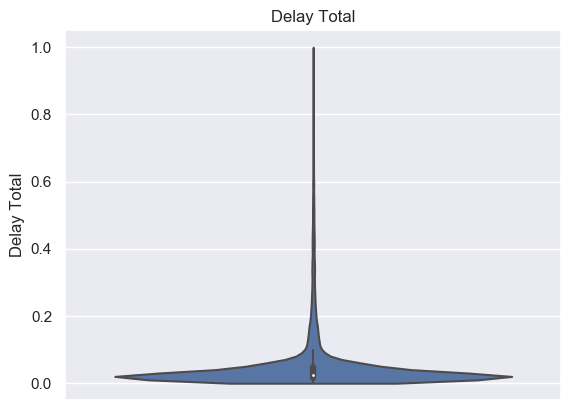

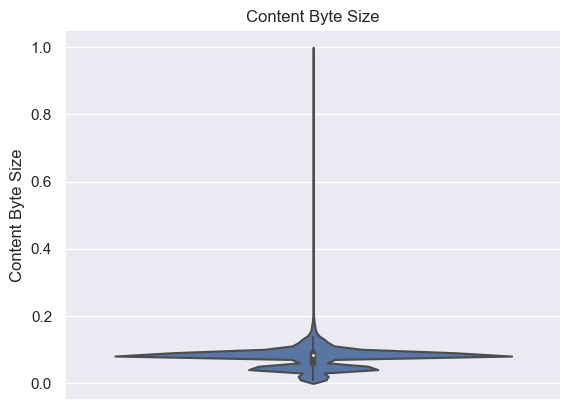

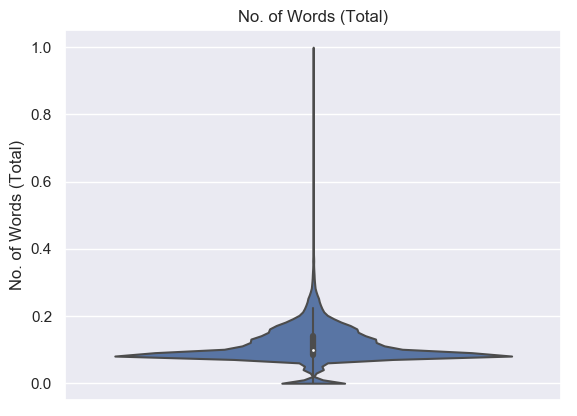

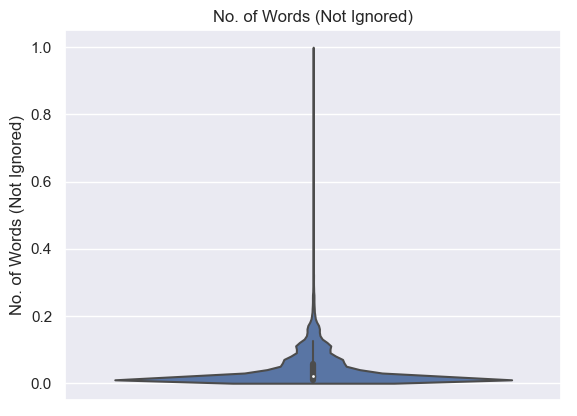

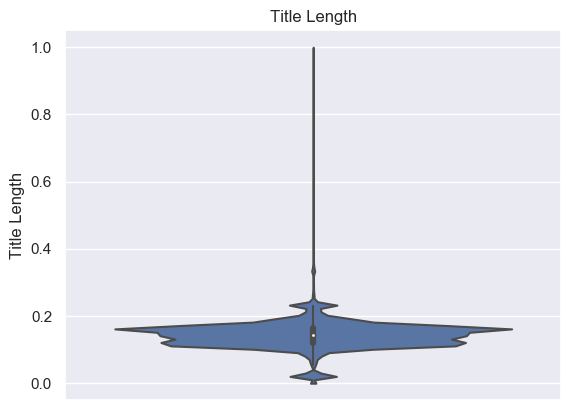

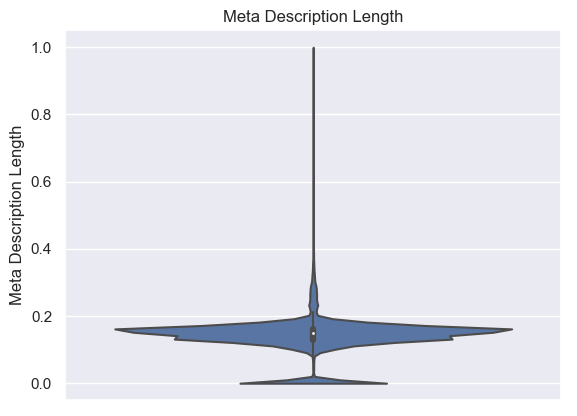

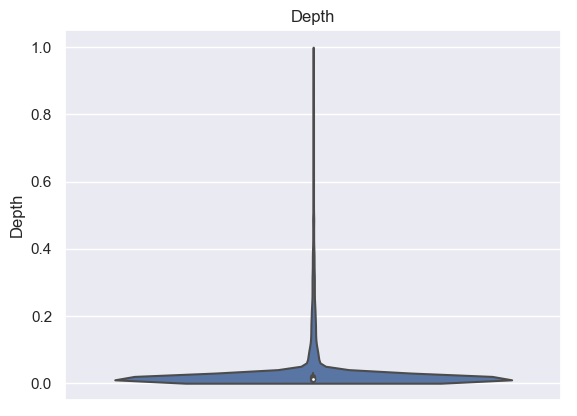

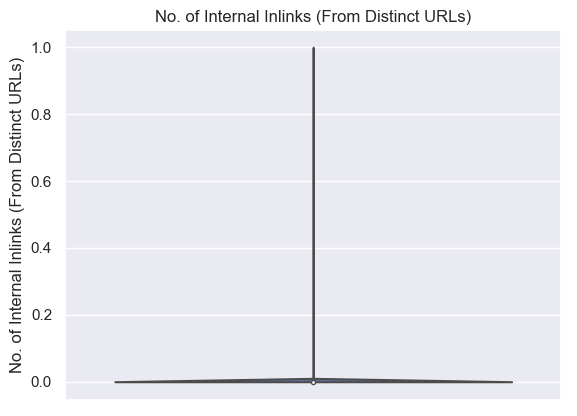

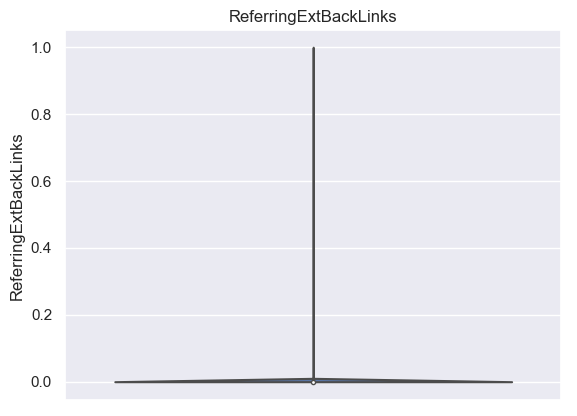

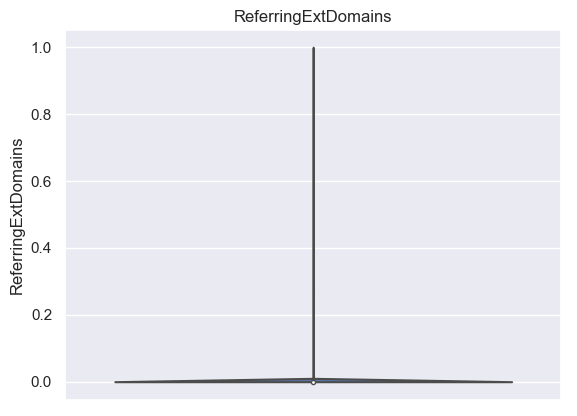

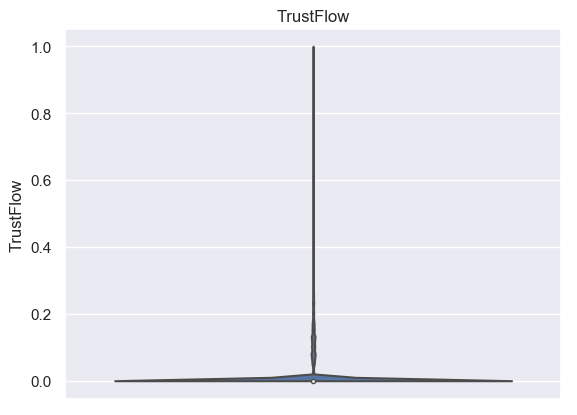

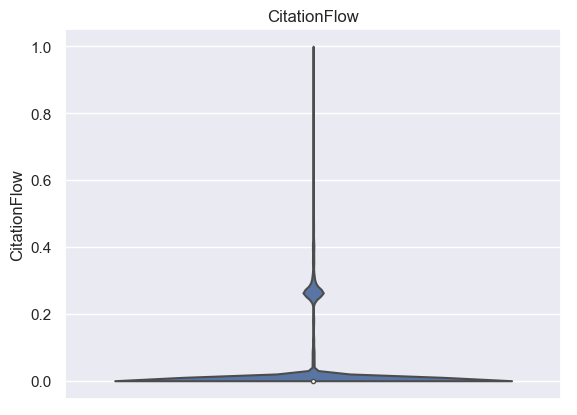

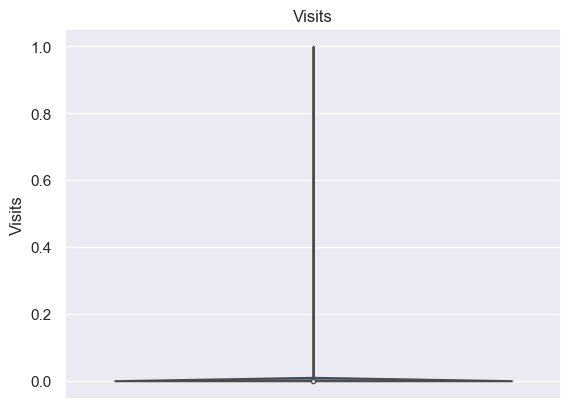

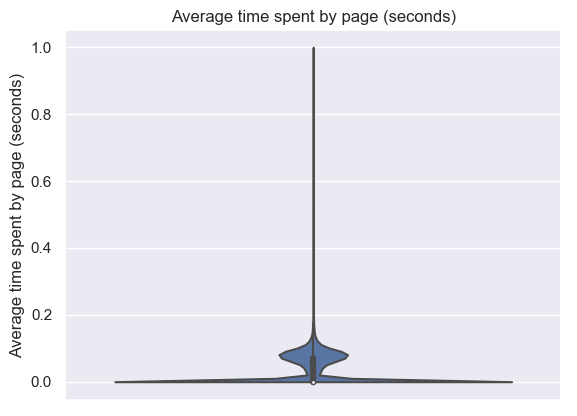

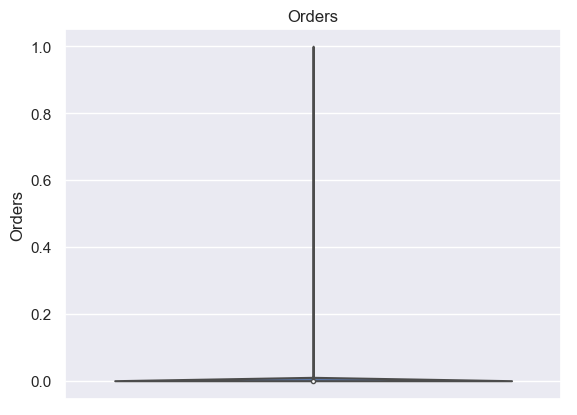

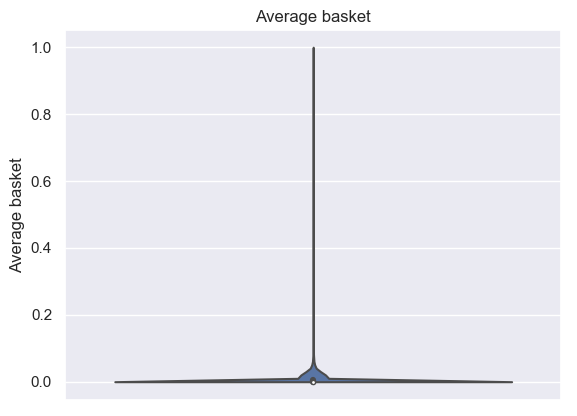

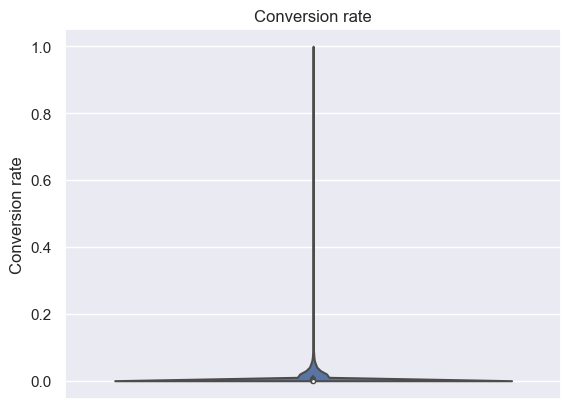

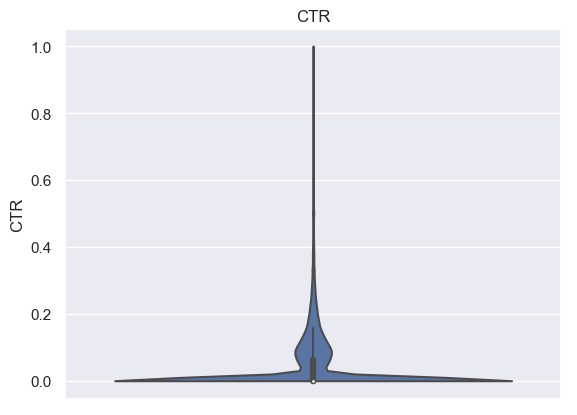

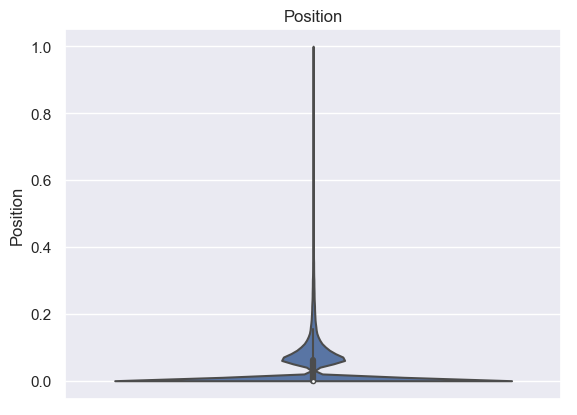

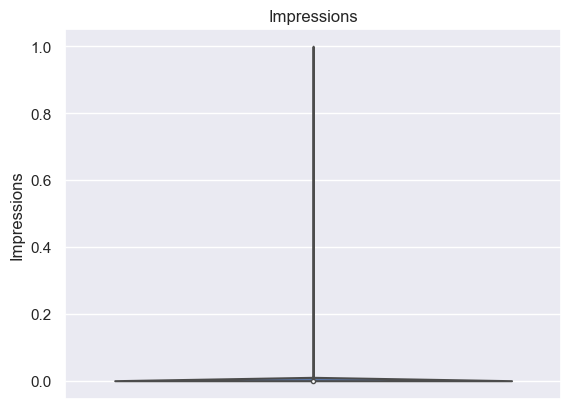

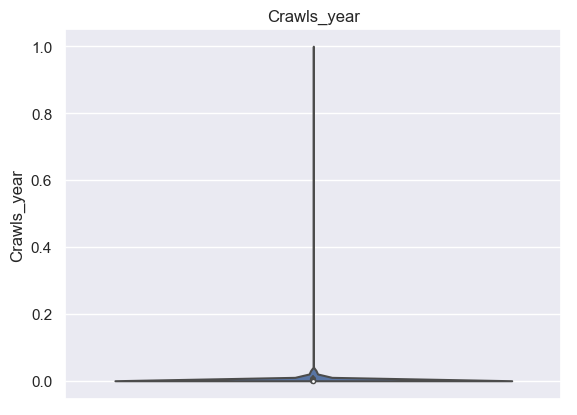

In [25]:
for c in data.select_dtypes(include=['float64','int64']).columns:
    plt.figure()
    sns.violinplot(data.loc[:,c], orient='v', cut = 0)
    plt.title(c)
    plt.show()

As we may see, all our numerical variables are largely skewed. We also have many variables with a majority of 0 values.
We will log the data to try to solve the first issue.

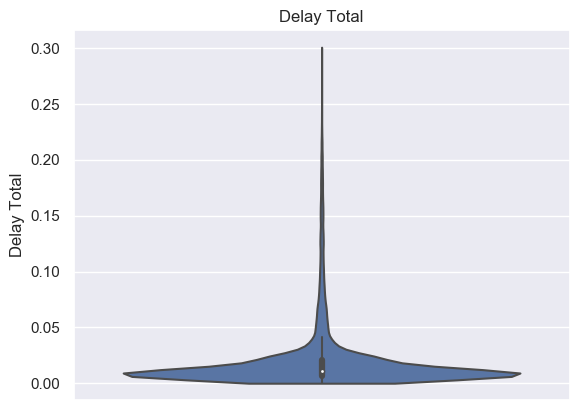

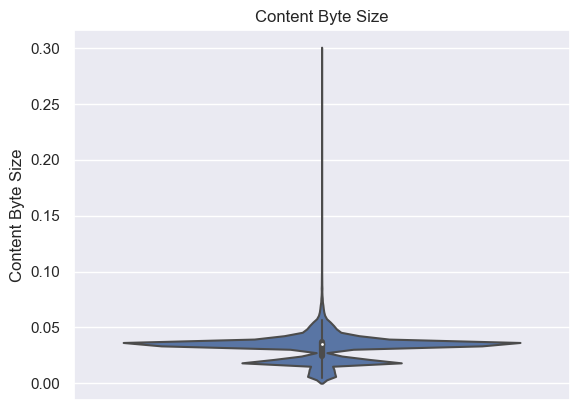

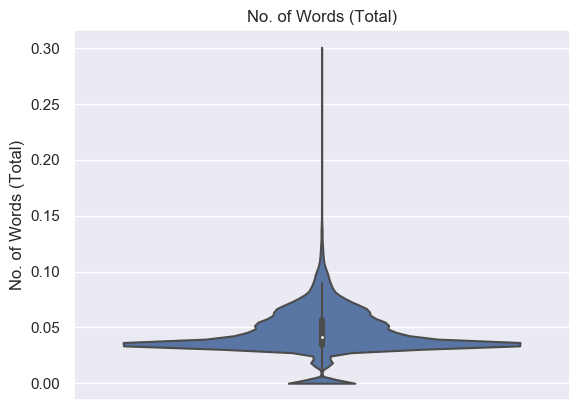

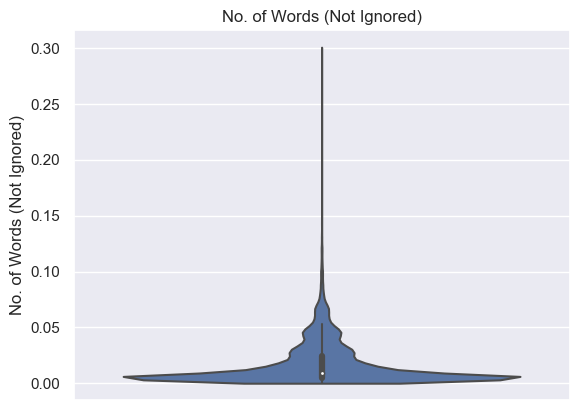

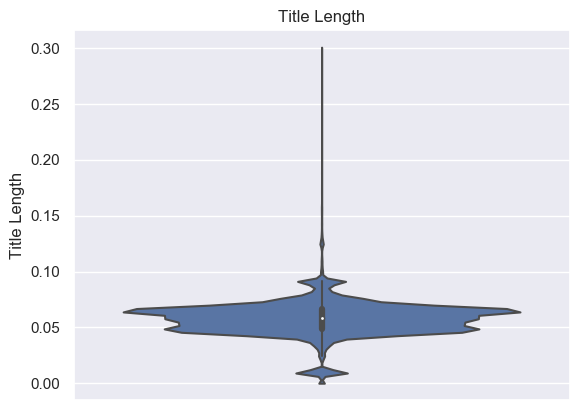

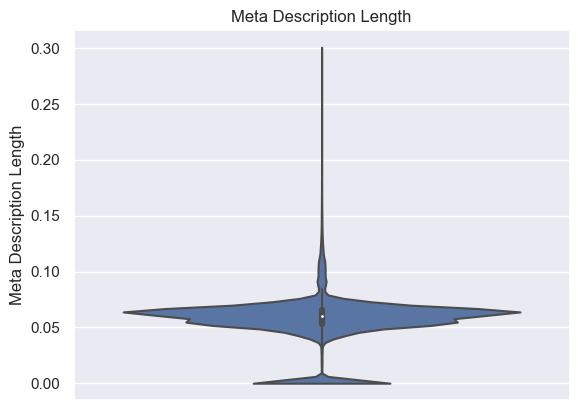

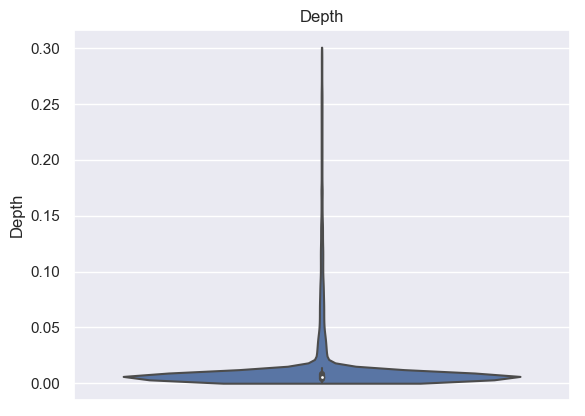

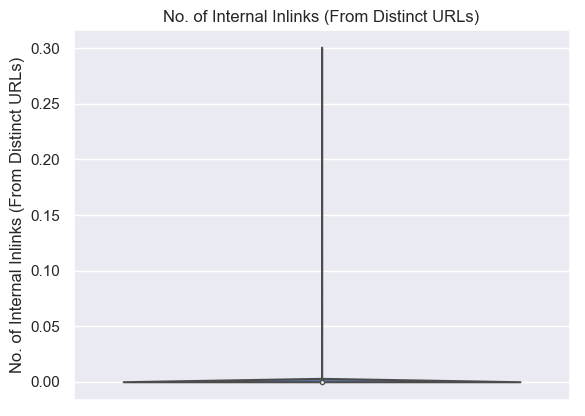

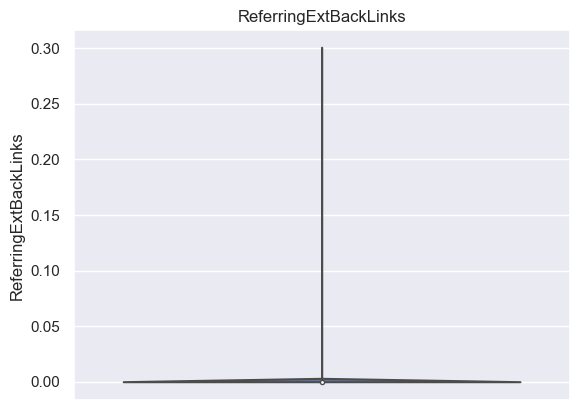

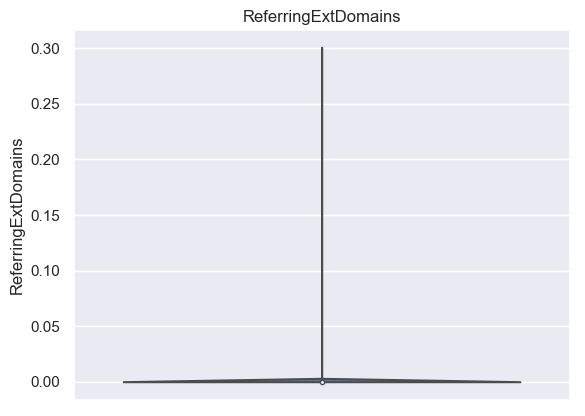

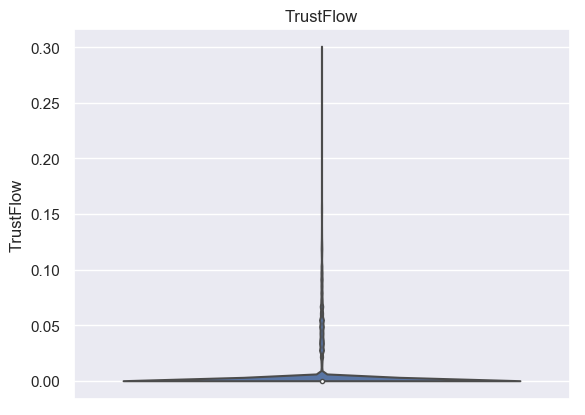

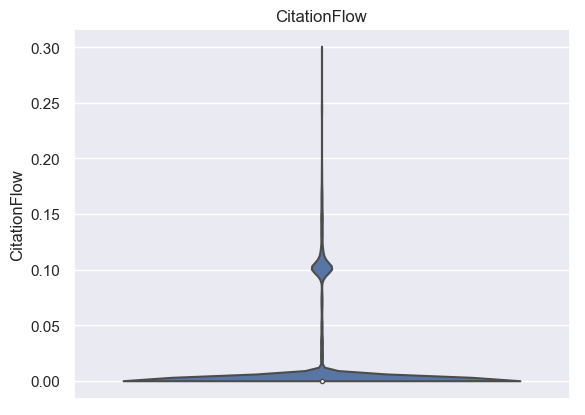

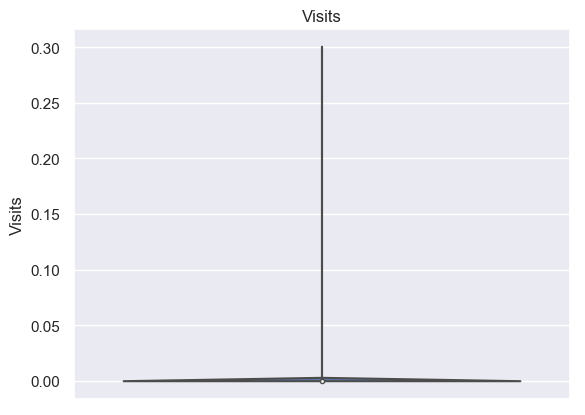

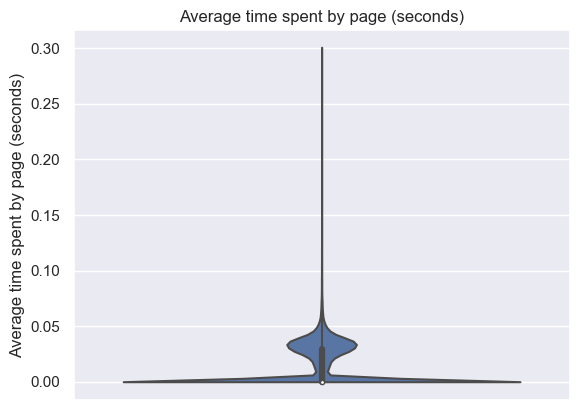

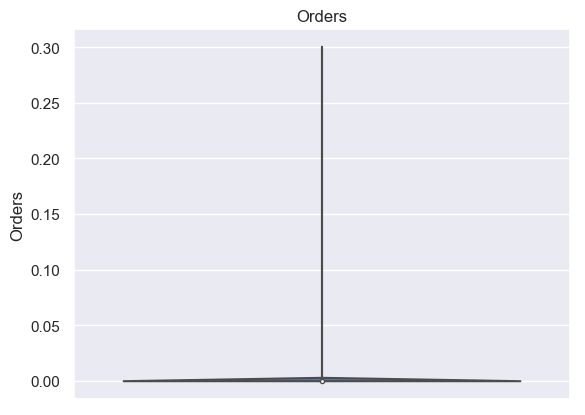

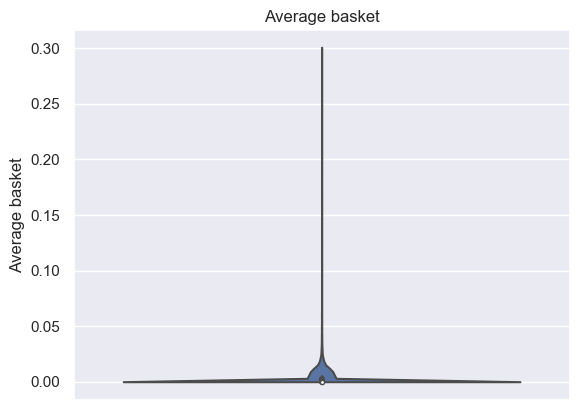

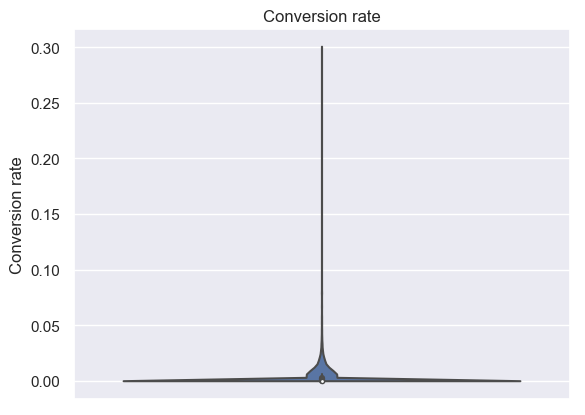

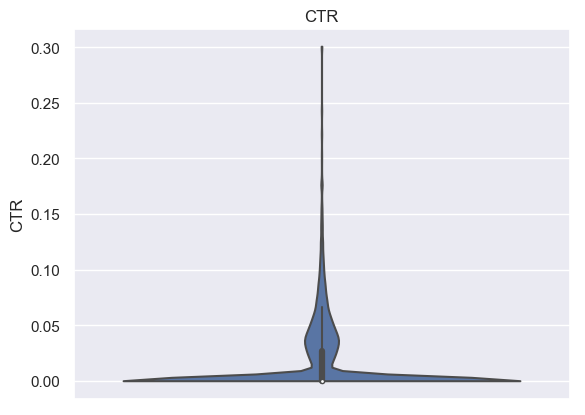

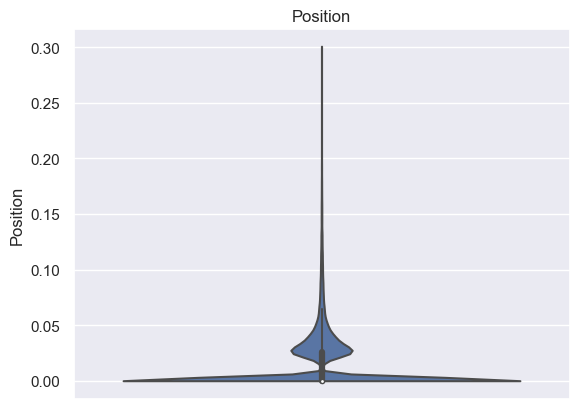

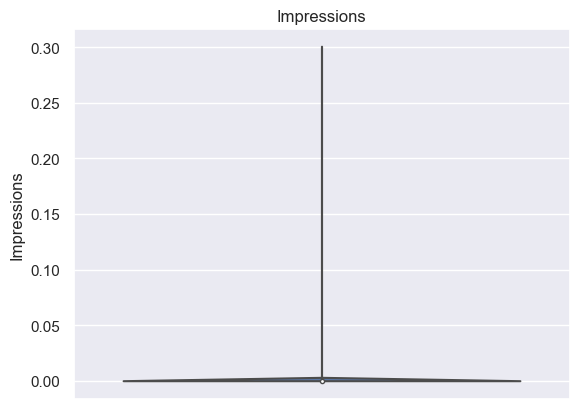

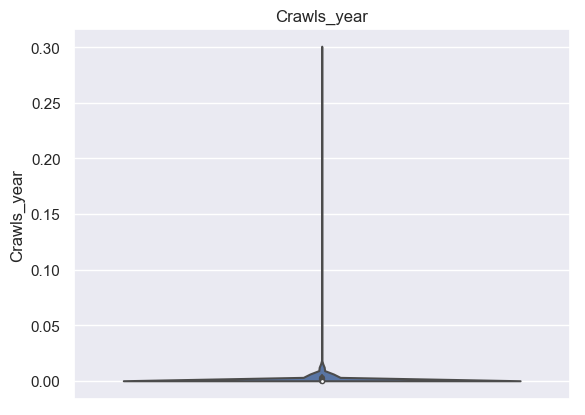

In [26]:
#Log for data
for c in data.select_dtypes(include=['float64','int64']).columns:
    data.loc[:,c] = np.log10(data.loc[:,c]+1)
    plt.figure()
    sns.violinplot(data.loc[:,c], orient='v', cut = 0)
    plt.title(c)
    plt.show()

Although the large amount or 0 values still unbalances the data, we can see that the densities are better distributed now.

In [27]:
#Log for training data 
for c in training_data.select_dtypes(include=['float64','int64']).columns:
    training_data.loc[:,c] = np.log10(training_data.loc[:,c]+1)
    
training_data = pd.concat([training_data, zombie], axis=1, sort=False)

In [28]:
data = data.replace({'pagetype': 'Article-list'}, 'Article')
data = data.replace({'pagetype': ['Aide', 'Autres/Mobile', 'Autres/Pro', 'Bus/Destination', 'Cartes-Abo', 
                                                    'Confidentialite', 'Destinations', 'EspaceClient', 'ext', 'Guide', 
                                                    'Homes', 'Host/AbonnementNL', 'Host/Autotrain', 'Host/Forfaithebdo',
                                                    'Host/Jobs', 'Host/Junior-Cie', 'Host/Open-VSC', 'Inspirationnel',
                                                    'LT-Train', 'pages-niv1', 'params/others', 'params/prex', 'params/rfrr',
                                                    'Promo', 'Services', 'Train/Autres', 'Train/Gare', 'Train/Pays', 
                                                    'Train/Regions', 'Train/Villes', 'Train-Avis', 'Transporteur/Destination',
                                                    'Transporteur/Principal', 'unknown', 'Vacances', 'Vol/Destination', 
                                                    'Voyage', 'Week-end/Pays', 'Week-end/RÃ©gion', 
                                                    'Week-end/Ville']}, 'Other')
Pagetype = pd.get_dummies(data['pagetype'])
data = data.merge(Pagetype, left_index=True, right_index=True)
data.head()

,URL,pagetype,Is Compliant,Delay Total,Content Byte Size,No. of Words (Total),No. of Words (Not Ignored),Title Length,Meta Description Length,Depth,...,Impressions,Crawls_year,Article,Bus/OD,Hotel,Other,Train/Horaires,Train/OD,Transporteur/OD,Vol/OD
0,https://www.oui.sncf/,Other,True,0.005577,0.076101,0.089866,0.068767,0.063052,0.069654,0.000000,...,0.265059,0.301030,0,0,0,1,0,0,0,0
1,https://www.oui.sncf/espaceclient/identification,Other,False,0.001710,0.017765,0.000000,0.000000,0.047850,0.000000,0.001377,...,0.011397,0.047991,0,0,0,1,0,0,0,0
3,https://www.oui.sncf/billet-train,Other,True,0.006700,0.054540,0.092346,0.065802,0.060912,0.054475,0.001377,...,0.291386,0.227747,0,0,0,1,0,0,0,0
4,https://www.oui.sncf/bons-plans/tgvmax,Other,True,0.004167,0.050567,0.136606,0.119440,0.046743,0.052263,0.001377,...,0.007022,0.022055,0,0,0,1,0,0,0,0
5,https://www.oui.sncf/bons-plans/tgvmax,Other,True,0.004167,0.050567,0.136606,0.119440,0.046743,0.052263,0.001377,...,0.007022,0.022055,0,0,0,1,0,0,0,0


In [29]:
training_data = training_data.replace({'pagetype': 'Article-list'}, 'Article')
training_data = training_data.replace({'pagetype': ['Aide', 'Autres/Mobile', 'Autres/Pro', 'Bus/Destination', 'Cartes-Abo', 
                                                    'Confidentialite', 'Destinations', 'EspaceClient', 'ext', 'Guide', 
                                                    'Homes', 'Host/AbonnementNL', 'Host/Autotrain', 'Host/Forfaithebdo',
                                                    'Host/Jobs', 'Host/Junior-Cie', 'Host/Open-VSC', 'Inspirationnel',
                                                    'LT-Train', 'pages-niv1', 'params/others', 'params/prex', 'params/rfrr',
                                                    'Promo', 'Services', 'Train/Autres', 'Train/Gare', 'Train/Pays', 
                                                    'Train/Regions', 'Train/Villes', 'Train-Avis', 'Transporteur/Destination',
                                                    'Transporteur/Principal', 'unknown', 'Vacances', 'Vol/Destination', 
                                                    'Voyage', 'Week-end/Pays', 'Week-end/RÃ©gion', 
                                                    'Week-end/Ville']}, 'Other')
Pagetype = pd.get_dummies(training_data['pagetype'])
training_data = training_data.merge(Pagetype, left_index=True, right_index=True)
training_data.head()

,URL,pagetype,Is Compliant,Delay Total,Content Byte Size,No. of Words (Total),No. of Words (Not Ignored),Title Length,Meta Description Length,Depth,...,Crawls_year,Zombie,Article,Bus/OD,Hotel,Other,Train/Horaires,Train/OD,Transporteur/OD,Vol/OD
7,https://www.oui.sncf/intercites/services/resta...,Other,True,0.006493,0.080828,0.125014,0.088422,0.127456,0.136970,0.0,...,0.029180,0,0,0,0,1,0,0,0,0
12,https://www.oui.sncf/services-train/carte-abon...,Other,True,0.003743,0.206226,0.293145,0.291827,0.050778,0.128886,0.0,...,0.059906,0,0,0,0,1,0,0,0,0
13,https://www.oui.sncf/services-train/carte-abon...,Other,True,0.003378,0.161908,0.301030,0.301030,0.050778,0.152701,0.0,...,0.079246,0,0,0,0,1,0,0,0,0
15,https://www.oui.sncf/services-train/carte-abon...,Other,True,0.002261,0.062658,0.080432,0.033683,0.119859,0.000000,0.0,...,0.041311,0,0,0,0,1,0,0,0,0
16,https://www.oui.sncf/services-train/carte-abon...,Other,True,0.002261,0.085473,0.207861,0.189653,0.079742,0.182549,0.0,...,0.172248,0,0,0,0,1,0,0,0,0


In [30]:
#dummy variables
data = pd.get_dummies(data, columns=['pagetype', 'Is Compliant'], drop_first=False)

In [31]:
#dummy variables
training_data = pd.get_dummies(training_data, columns=['pagetype', 'Is Compliant'], drop_first=False)

In [32]:
data.head()

,URL,Delay Total,Content Byte Size,No. of Words (Total),No. of Words (Not Ignored),Title Length,Meta Description Length,Depth,No. of Internal Inlinks (From Distinct URLs),ReferringExtBackLinks,...,pagetype_Article,pagetype_Bus/OD,pagetype_Hotel,pagetype_Other,pagetype_Train/Horaires,pagetype_Train/OD,pagetype_Transporteur/OD,pagetype_Vol/OD,Is Compliant_False,Is Compliant_True
0,https://www.oui.sncf/,0.005577,0.076101,0.089866,0.068767,0.063052,0.069654,0.000000,0.301030,0.301030,...,0,0,0,1,0,0,0,0,0,1
1,https://www.oui.sncf/espaceclient/identification,0.001710,0.017765,0.000000,0.000000,0.047850,0.000000,0.001377,0.021666,0.000019,...,0,0,0,1,0,0,0,0,1,0
3,https://www.oui.sncf/billet-train,0.006700,0.054540,0.092346,0.065802,0.060912,0.054475,0.001377,0.122526,0.009665,...,0,0,0,1,0,0,0,0,0,1
4,https://www.oui.sncf/bons-plans/tgvmax,0.004167,0.050567,0.136606,0.119440,0.046743,0.052263,0.001377,0.092186,0.000000,...,0,0,0,1,0,0,0,0,0,1
5,https://www.oui.sncf/bons-plans/tgvmax,0.004167,0.050567,0.136606,0.119440,0.046743,0.052263,0.001377,0.092186,0.000000,...,0,0,0,1,0,0,0,0,0,1


In [33]:
training_data.head()

,URL,Delay Total,Content Byte Size,No. of Words (Total),No. of Words (Not Ignored),Title Length,Meta Description Length,Depth,No. of Internal Inlinks (From Distinct URLs),ReferringExtBackLinks,...,pagetype_Article,pagetype_Bus/OD,pagetype_Hotel,pagetype_Other,pagetype_Train/Horaires,pagetype_Train/OD,pagetype_Transporteur/OD,pagetype_Vol/OD,Is Compliant_False,Is Compliant_True
7,https://www.oui.sncf/intercites/services/resta...,0.006493,0.080828,0.125014,0.088422,0.127456,0.136970,0.0,0.061939,0.001103,...,0,0,0,1,0,0,0,0,0,1
12,https://www.oui.sncf/services-train/carte-abon...,0.003743,0.206226,0.293145,0.291827,0.050778,0.128886,0.0,0.295114,0.013054,...,0,0,0,1,0,0,0,0,0,1
13,https://www.oui.sncf/services-train/carte-abon...,0.003378,0.161908,0.301030,0.301030,0.050778,0.152701,0.0,0.295137,0.013346,...,0,0,0,1,0,0,0,0,0,1
15,https://www.oui.sncf/services-train/carte-abon...,0.002261,0.062658,0.080432,0.033683,0.119859,0.000000,0.0,0.295114,0.003699,...,0,0,0,1,0,0,0,0,0,1
16,https://www.oui.sncf/services-train/carte-abon...,0.002261,0.085473,0.207861,0.189653,0.079742,0.182549,0.0,0.295118,0.059395,...,0,0,0,1,0,0,0,0,0,1


***
## Machine Learning Model Creation

**Separating target variable from our data**

In [34]:
import sklearn 
from sklearn.model_selection import train_test_split

X = training_data.drop(['URL','Zombie'], axis=1)
y = training_data["Zombie"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Using SMOTE, an oversampling technique to tackle the lack of zombie labels.

In [35]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2748, 39)
(2748,)
(263, 39)
(263,)


In [37]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [38]:
models_sel = [
    # Linear model
    RidgeClassifierCV(),
    # Ensemble methods
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    # Tree
    DecisionTreeClassifier(),
    # Support Vector Classification
    LinearSVC(),
]

cv_split = ShuffleSplit(n_splits = 5, test_size = .2, train_size = .7, random_state = 86 )

models_columns = ['model_name', 'model_params','model_train_acc_mean', 
                  'model_test_acc_mean', 'model_test_acc_3*std' ,'model_fit_time']

models_compare_sel = pd.DataFrame(columns = models_columns)


index = 0

In [39]:
for model in models_sel:
    
    model_name = model.__class__.__name__
    print(model_name)
    models_compare_sel.loc[index, 'model_name'] = model_name
    models_compare_sel.loc[index, 'model_params'] = str(model.get_params())
    
    model = RFECV(estimator=model, step=1, cv=3)
    
    cv_score = cross_validate(model, X, y,cv=cv_split)
    
    models_compare_sel.loc[index, 'model_fit_time'] = cv_score['fit_time'].mean()
    models_compare_sel.loc[index, 'model_train_acc_mean'] = cv_score['train_score'].mean()
    models_compare_sel.loc[index, 'model_test_acc_mean'] = cv_score['test_score'].mean() 
    
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
    #should statistically capture 99.7% of the subsets
    models_compare_sel.loc[index, 'model_test_acc_3*std'] = cv_score['test_score'].std()*3
    
    model.fit(X, y)
    models_compare_sel.loc[index, 'model_n_features'] = model.n_features_
    models_compare_sel.loc[index, 'model_features'] = str(model.support_)
    
    index += 1

models_compare_sel.sort_values(by = ['model_test_acc_mean'], ascending = False, inplace = True)

RidgeClassifierCV


C:\Users\juann\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


RandomForestClassifier


C:\Users\juann\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\juann\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\juann\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\juann\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\juann\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

GradientBoostingClassifier


C:\Users\juann\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


ExtraTreesClassifier


C:\Users\juann\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\juann\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\juann\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\juann\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\juann\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

DecisionTreeClassifier


C:\Users\juann\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


LinearSVC


C:\Users\juann\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [40]:
models_compare_sel

,model_name,model_params,model_train_acc_mean,model_test_acc_mean,model_test_acc_3*std,model_fit_time,model_n_features,model_features
3,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.998693,0.956654,0.0245711,3.29563,4.0,[False True True False False False False Fal...
1,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.995207,0.956654,0.0256083,4.69661,2.0,[False True True False False False False Fal...
2,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.997821,0.953612,0.018251,117.326,3.0,[False True False False False False False Fal...
4,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.998693,0.951331,0.0254042,0.724582,2.0,[False True False False False False False Fal...
5,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.93878,0.927757,0.0461942,2.01655,2.0,[False True False False False False False Fal...
0,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.931373,0.920152,0.0641223,0.993764,1.0,[False False False False False False True Fal...


In [41]:
models_compare_sel.to_excel("models_comparison.xlsx")

In [47]:
print('The best model is :', models_compare_sel.iloc[0,0], '\n')
#print('Its parameters are :', models_compare_sel.iloc[0,1], '\n')
print('It retains only the following number of features :', models_compare_sel.iloc[0,-2])

The best model is : ExtraTreesClassifier 

It retains only the following number of features : 4.0


In [43]:
# Features retained
models_compare_sel.iloc[0,-1]

'[False  True  True False False False False False False False False  True\n False False False False False False False False False False False False\n False False False False  True False False False False False False False\n False False False]'

In [44]:
# Features retained
a = list(X.columns)

print('It retains only the following features :')
print(a[1])
print(a[2])
print(a[11])
print(a[28])

It retains only the following features :
Content Byte Size
No. of Words (Total)
CitationFlow
Vol/OD


***
## Predicting on the whole Data Set

In [58]:
extra_trees = ExtraTreesClassifier(bootstrap = False, class_weight = None, criterion = 'gini', max_depth = None, max_features = 'auto', max_leaf_nodes = None, min_impurity_decrease = 0.0, min_impurity_split = None, min_samples_leaf = 1, min_samples_split = 2, min_weight_fraction_leaf = 0.0, n_estimators = 'warn', n_jobs = None, oob_score = False, random_state = None, verbose = 0, warm_start = False)
extra_trees.fit(X_train, y_train)
Y_prediction = extra_trees.predict(X_test)

test_accuracy = round(extra_trees.score(X_test, y_test) * 100, 2)
print('Test accuracy : {:0.2f}%'.format(test_accuracy))

Test accuracy : 93.16%


C:\Users\juann\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       229
           1       0.81      0.94      0.87        18
           2       0.50      0.56      0.53        16

   micro avg       0.93      0.93      0.93       263
   macro avg       0.76      0.82      0.79       263
weighted avg       0.94      0.93      0.93       263



Prediction on the whole Data Set

In [85]:
#drop URL from data
url = data["URL"]
data_1 = data.drop("URL", axis =1).copy()

Y_whole_Data = pd.DataFrame(extra_trees.predict(data_1))

prediction = pd.concat([url, Y_whole_Data], axis=1, sort=False)

prediction.to_excel("prediction.xlsx")

C:\Users\juann\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring URL 'https://www.oui.sncf/train/horaires/lille/paris?ef_id=CjwKCAiAy-_iBRAaEiwAYhSlAzlrp87YOc0T1Yjpel_fX57kwkIQBR-kUTizKUXNb9YaVJKcV-Dl3BoCXeIQAvD_BwE:G:s&esl-k=sem-google%7Cng%7Cc237629643030%7Cme%7Cktrain%20lille%20paris%7Cp%7Ct%7Cdm%7Ca27981194945%7Cg389841545&prex=T_LSP_53074FACD8C84&s_kwcid=AL!453!3!237629643030!e!!g!!train%20lille%20paris' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\Users\juann\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:832: UserWarning: Ignoring URL 'https://www.oui.sncf/train/horaires/paris/lyon?ef_id=EAIaIQobChMIu_qp-bup4AIVhPhRCh37bg6sEAAYASAAEgKc6fD_BwE:G:s&esl-k=sem-google%7Cng%7Cc237654293509%7Cme%7Ckparis%20lyon%20tgv%7Cp%7Ct%7Cdm%7Ca27981243665%7Cg389842625&prex=T_LSP_53074FACD8C84&s_kwcid=AL!453!3!237654293509!e!!g!!paris%20lyon%20tgv' with link or location/anchor > 255 characters since

In [80]:
prediction[ prediction[0] == 2].head()

,URL,0
47,https://www.oui.sncf/article,2.0
48,https://ouitalk.oui.sncf/onyva,2.0
50,https://www.oui.sncf/promotion-train/tgv-inoui,2.0
51,https://www.oui.sncf/transporteurs/bus-covoitu...,2.0
52,https://www.oui.sncf/promotion-train/campagne-...,2.0


In [84]:
prediction[0].value_counts()

0.0    17250
2.0    10875
1.0     7143
Name: 0, dtype: int64